# Übung Modellierung von Energiesystemen 
## PyPSA 02

### Aufgabe: Implementieren Sie das Vorlesungsbeispiel

Importieren Sie zunächst die benötigten Bibliotheken

In [1]:
import pypsa
import pandas as pd

Die Lastgänge Ihres Auftraggebers sind in der Datei 'data_PyPSA_2.csv' gespeichert, lesen Sie diese mit pandas ein.

In [2]:
df_data = pd.read_csv('data_PyPSA_02.csv')

In [3]:
df_data

,elektrische Last,PV Erzeugung,Wärmelast
0,0.433394,0.0,3.075631
1,1.030247,0.0,3.036577
2,0.542903,0.0,3.008365
3,0.584443,0.0,2.995391
4,0.524573,0.0,2.987550
...,...,...,...
8779,0.541104,0.0,3.538371
8780,0.851679,0.0,3.386830
8781,0.424584,0.0,3.235733
8782,0.641945,0.0,3.133662


Definieren Sie dann alle Variablen, die Sie benötigen um das System zu implementieren.

In [4]:
#Basissystem 
pv_p_nom = 10 #in kWp
pv_p_pu = df_data['PV Erzeugung']/pv_p_nom 

gas_price = 0.123 #in €/kWh
electricity_price = 0.409 # in €/kWh
electricty_import_p_nom = 20 # Leistung des Netzanschlusses in kW
boiler_eff = 0.99 #Effizienz des Gasboilers in pu
boiler_p_nom = 10 # Thermische Leistung des boilers in kW

thermal_storage_capacity = 10 # Kapazität des Speichers in kWh
thermal_storage_self_discharge = 0.005 # Selbstentladungsverluste in pu pro Stunde

#Erweiterung
heating_rod_capital_cost = 10 # Annuität, In Euro für 2 kW
heating_rod_eff = 0.99 # Effizienz des Heizstabes
heating_rod_p_nom = 3 #Leistung des Heizstabes in kW

Erzeugen Sie nun eine Variable network, welche ein Netzwerkobjekt enthält. Dies können Sie über die pypsa Bibliothek und die Funktion _pypsa.Network()_ tun. <br> Nutzen Sie anschließend die Methode set_snapshots und setzen Sie diese auf 8784. Sie können dafür den index des _data_ Datenframes oder die Funktion range() benutzen.

Fügen Sie ihrem Netzwerk mit der methode add() nun die Komponenten ihres Energiesystems hinzu. <br>
Hinweis: Wenn Sie darauf achten, dass Ihre Einheiten über alle Komponenten einheitlich sind, müssen Sie nicht in MW und € rechnen, sondern können auch ct oder kW nutzen.  

In [5]:
network = pypsa.Network()
network.set_snapshots(range(8784))

network.add('Bus',name = 'electrical')
network.add('Bus', name = 'thermal')

network.add('Load', name = 'elekrische Last', bus = 'electrical', 
            p_set = df_data['elektrische Last'])
network.add('Load', name = 'thermische Last', bus = 'thermal', 
           p_set = df_data['Wärmelast'])

network.add('Generator', name = 'Netzbezug', bus = 'electrical', 
            p_nom = electricty_import_p_nom, marginal_cost = electricity_price)
network.add('Generator', name = 'PV', bus = 'electrical',
           p_nom = pv_p_nom, p_max_pu = pv_p_pu)
network.add('Generator', name = 'Erdgaskessel', 
           bus = 'thermal',
           p_nom = boiler_p_nom,
            marginal_cost = gas_price/boiler_eff)

network.add('Store', name = 'Warmwasserspeicher', bus = 'thermal', 
            e_nom = thermal_storage_capacity,
            standing_loss = thermal_storage_self_discharge)

network.optimize(solver_name= 'gurobi')

Index(['Warmwasserspeicher'], dtype='object', name='Store')
Index(['electrical', 'thermal'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 3/3 [00:00<00:00, 35.43it/s]
INFO:linopy.io: Writing time: 0.51s


Set parameter ServerTimeout to value 10


INFO:gurobipy:Set parameter ServerTimeout to value 10


Set parameter TokenServer to value "139.6.183.241"


INFO:gurobipy:Set parameter TokenServer to value "139.6.183.241"


Read LP format model from file /tmp/linopy-problem-vp1snzz6.lp


INFO:gurobipy:Read LP format model from file /tmp/linopy-problem-vp1snzz6.lp


Reading time = 0.18 seconds


INFO:gurobipy:Reading time = 0.18 seconds


obj: 96624 rows, 43920 columns, 131759 nonzeros


INFO:gurobipy:obj: 96624 rows, 43920 columns, 131759 nonzeros


Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.1 LTS")


INFO:gurobipy:Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.1 LTS")


INFO:gurobipy:


CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]


INFO:gurobipy:CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]


Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 96624 rows, 43920 columns and 131759 nonzeros


INFO:gurobipy:Optimize a model with 96624 rows, 43920 columns and 131759 nonzeros


Model fingerprint: 0x67977184


INFO:gurobipy:Model fingerprint: 0x67977184


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 1e+00]


INFO:gurobipy:  Matrix range     [1e+00, 1e+00]


  Objective range  [1e-01, 4e-01]


INFO:gurobipy:  Objective range  [1e-01, 4e-01]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-02, 2e+01]


INFO:gurobipy:  RHS range        [1e-02, 2e+01]


Presolve removed 87841 rows and 26353 columns


INFO:gurobipy:Presolve removed 87841 rows and 26353 columns


Presolve time: 0.11s


INFO:gurobipy:Presolve time: 0.11s


Presolved: 8783 rows, 17567 columns, 26349 nonzeros


INFO:gurobipy:Presolved: 8783 rows, 17567 columns, 26349 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 8.782e+03


INFO:gurobipy: AA' NZ     : 8.782e+03


 Factor NZ  : 1.447e+05 (roughly 12 MB of memory)


INFO:gurobipy: Factor NZ  : 1.447e+05 (roughly 12 MB of memory)


 Factor Ops : 3.043e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.043e+06 (less than 1 second per iteration)


 Threads    : 10


INFO:gurobipy: Threads    : 10


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.13382963e+03 -1.53394640e+04  1.94e+00 2.78e-17  9.23e-01     0s


INFO:gurobipy:   0   7.13382963e+03 -1.53394640e+04  1.94e+00 2.78e-17  9.23e-01     0s


   1   2.87874999e+03 -1.02498427e+03  2.98e-03 1.67e-16  1.11e-01     1s


INFO:gurobipy:   1   2.87874999e+03 -1.02498427e+03  2.98e-03 1.67e-16  1.11e-01     1s


INFO:gurobipy:


Barrier performed 1 iterations in 0.55 seconds (0.07 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.55 seconds (0.07 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with primal simplex


INFO:gurobipy:Solved with primal simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       3    2.8445307e+03   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:       3    2.8445307e+03   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 3 iterations and 0.96 seconds (0.11 work units)


INFO:gurobipy:Solved in 3 iterations and 0.96 seconds (0.11 work units)


Optimal objective  2.844530700e+03


INFO:gurobipy:Optimal objective  2.844530700e+03
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 43920 primals, 96624 duals
Objective: 2.84e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

'Optimieren Sie das Energiemodell mit der Methode .optimize(solver_name = 'gurobi') <br> Geben Sie sich anschließend die Ergbnisse mit den folgenden Befehlen aus:
* network.loads_t.p.plot()
* network.generators_t.p.plot()


<Axes: xlabel='snapshot'>

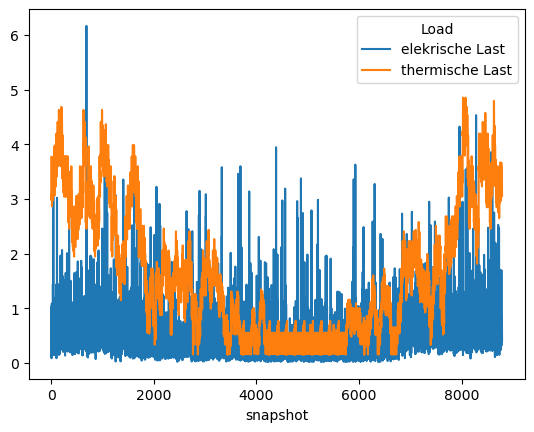

In [6]:
network.loads_t.p.plot()

<Axes: xlabel='snapshot'>

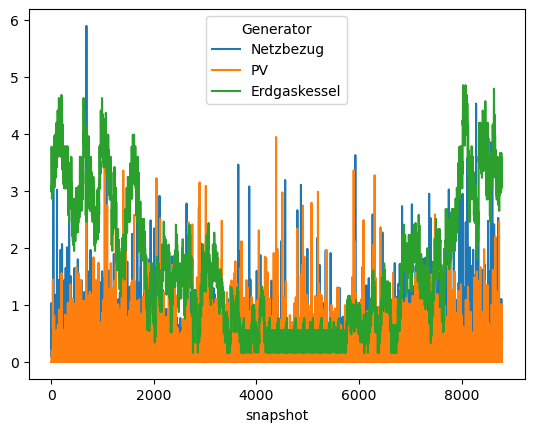

In [7]:
network.generators_t.p.plot()

Berechnen Sie die Kosten des Systems.

In [8]:
kapitalkosten_basissystem = 0
betriebskosten_basissystem = (network.generators_t.p.sum() * 
                            network.generators.marginal_cost).sum()
gesamtkosten_basissystem = (kapitalkosten_basissystem + 
                            betriebskosten_basissystem )
print(gesamtkosten_basissystem)

2844.530700369449


Erweitern Sie das System um den Heizstab und führen Sie die Schritte ab der Optimierung erneut durch.

In [9]:
network.add('Link', name = 'Heizstab', bus0 = 'electrical', 
            bus1 = 'thermal', efficiency = heating_rod_eff, p_nom = heating_rod_p_nom)


Index(['Heizstab'], dtype='object')

In [10]:
network.optimize(solver_name = 'gurobi')

Index(['Warmwasserspeicher'], dtype='object', name='Store')
Index(['Heizstab'], dtype='object', name='Link')
Index(['electrical', 'thermal'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 35.26it/s]
INFO:linopy.io: Writing time: 0.66s


Set parameter ServerTimeout to value 10


INFO:gurobipy:Set parameter ServerTimeout to value 10


Set parameter TokenServer to value "139.6.183.241"


INFO:gurobipy:Set parameter TokenServer to value "139.6.183.241"


Read LP format model from file /tmp/linopy-problem-9zhngq9v.lp


INFO:gurobipy:Read LP format model from file /tmp/linopy-problem-9zhngq9v.lp


Reading time = 0.23 seconds


INFO:gurobipy:Reading time = 0.23 seconds


obj: 114192 rows, 52704 columns, 166895 nonzeros


INFO:gurobipy:obj: 114192 rows, 52704 columns, 166895 nonzeros


Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.1 LTS")


INFO:gurobipy:Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.1 LTS")


INFO:gurobipy:


CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]


INFO:gurobipy:CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]


Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 114192 rows, 52704 columns and 166895 nonzeros


INFO:gurobipy:Optimize a model with 114192 rows, 52704 columns and 166895 nonzeros


Model fingerprint: 0x1d142dc7


INFO:gurobipy:Model fingerprint: 0x1d142dc7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 1e+00]


INFO:gurobipy:  Matrix range     [1e+00, 1e+00]


  Objective range  [1e-01, 4e-01]


INFO:gurobipy:  Objective range  [1e-01, 4e-01]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-02, 2e+01]


INFO:gurobipy:  RHS range        [1e-02, 2e+01]


Presolve removed 103599 rows and 22735 columns


INFO:gurobipy:Presolve removed 103599 rows and 22735 columns


Presolve time: 0.15s


INFO:gurobipy:Presolve time: 0.15s


Presolved: 10593 rows, 29969 columns, 40561 nonzeros


INFO:gurobipy:Presolved: 10593 rows, 29969 columns, 40561 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 1.059e+04


INFO:gurobipy: AA' NZ     : 1.059e+04


 Factor NZ  : 1.655e+05 (roughly 18 MB of memory)


INFO:gurobipy: Factor NZ  : 1.655e+05 (roughly 18 MB of memory)


 Factor Ops : 3.309e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.309e+06 (less than 1 second per iteration)


 Threads    : 10


INFO:gurobipy: Threads    : 10


INFO:gurobipy:


Barrier performed 0 iterations in 1.67 seconds (0.09 work units)


INFO:gurobipy:Barrier performed 0 iterations in 1.67 seconds (0.09 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with primal simplex


INFO:gurobipy:Solved with primal simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    8774    2.2808997e+03   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    8774    2.2808997e+03   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 8774 iterations and 2.27 seconds (0.18 work units)


INFO:gurobipy:Solved in 8774 iterations and 2.27 seconds (0.18 work units)


Optimal objective  2.280899705e+03


INFO:gurobipy:Optimal objective  2.280899705e+03
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 52704 primals, 114192 duals
Objective: 2.28e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

In [11]:
kapitalkosten_erweiterung1 = heating_rod_capital_cost #€ als Anuität
betriebskosten_erweiterung1 = (network.generators_t.p.sum() * 
                            network.generators.marginal_cost).sum()
gesamtkosten_erweiterung1 = (kapitalkosten_erweiterung1 + 
                            betriebskosten_erweiterung1 )
print(gesamtkosten_erweiterung1)

2290.899704673301


Erweitern Sie das System nun um den elektrischen Speicher und führen Sie die restlichen Schritte erneut durch. <br> Anschließend können Sie die Kosten der unterschiedlichen Systemkonfigurationen vergleichen

In [12]:
#Erweiterung 2
electrical_storage_capacity = 5.0 # SENEC.Home V3 hybrid
electricial_storage_charge_capacity = 1.25 # SENEC.Home V3 hybrid
electricial_storage_discharge_capacity = 2.5 # SENEC.Home V3 hybrid
electrical_storage_capital_cost = 500 # Annuität 20 Jahre, SENEC.Home V3 hybrid
electrical_storage_eff = 0.97 # SENEC.Home V3 hybrid

In [13]:
network.add('Bus', name = 'storage_bus')

network.add('Store', name = 'Stromspeicher', bus = 'storage_bus',
            e_nom = electrical_storage_capacity)

network.add('Link', name = 'charge', bus0 = 'electrical', bus1 = 'storage_bus',
           p_nom = electricial_storage_charge_capacity, 
            efficiency = electrical_storage_eff**0.5)

network.add('Link', name = 'discharge', bus0 = 'storage_bus', 
            bus1 = 'electrical', 
            p_nom = electricial_storage_discharge_capacity/electrical_storage_eff**0.5, 
            efficiency = electrical_storage_eff**0.5)

Index(['discharge'], dtype='object')

In [14]:
network.optimize(solver_name = 'gurobi')

Index(['Warmwasserspeicher', 'Stromspeicher'], dtype='object', name='Store')
Index(['Heizstab', 'charge', 'discharge'], dtype='object', name='Link')
Index(['electrical', 'thermal', 'storage_bus'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 4/4 [00:00<00:00, 22.98it/s]
INFO:linopy.io: Writing time: 0.99s


Set parameter ServerTimeout to value 10


INFO:gurobipy:Set parameter ServerTimeout to value 10


Set parameter TokenServer to value "139.6.183.241"


INFO:gurobipy:Set parameter TokenServer to value "139.6.183.241"


Read LP format model from file /tmp/linopy-problem-o7epw8jr.lp


INFO:gurobipy:Read LP format model from file /tmp/linopy-problem-o7epw8jr.lp


Reading time = 0.32 seconds


INFO:gurobipy:Reading time = 0.32 seconds


obj: 184464 rows, 87840 columns, 289870 nonzeros


INFO:gurobipy:obj: 184464 rows, 87840 columns, 289870 nonzeros


Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.1 LTS")


INFO:gurobipy:Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.1 LTS")


INFO:gurobipy:


CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]


INFO:gurobipy:CPU model: Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]


Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 184464 rows, 87840 columns and 289870 nonzeros


INFO:gurobipy:Optimize a model with 184464 rows, 87840 columns and 289870 nonzeros


Model fingerprint: 0x11bc266d


INFO:gurobipy:Model fingerprint: 0x11bc266d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 1e+00]


INFO:gurobipy:  Matrix range     [1e+00, 1e+00]


  Objective range  [1e-01, 4e-01]


INFO:gurobipy:  Objective range  [1e-01, 4e-01]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-02, 2e+01]


INFO:gurobipy:  RHS range        [1e-02, 2e+01]


Presolve removed 158148 rows and 24140 columns


INFO:gurobipy:Presolve removed 158148 rows and 24140 columns


Presolve time: 0.26s


INFO:gurobipy:Presolve time: 0.26s


Presolved: 26316 rows, 63700 columns, 107510 nonzeros


INFO:gurobipy:Presolved: 26316 rows, 63700 columns, 107510 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.506e+04


INFO:gurobipy: AA' NZ     : 3.506e+04


 Factor NZ  : 3.795e+05 (roughly 40 MB of memory)


INFO:gurobipy: Factor NZ  : 3.795e+05 (roughly 40 MB of memory)


 Factor Ops : 6.913e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.913e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.42685545e+04 -1.02993818e+05  5.38e+00 1.17e-01  2.65e+00     0s


INFO:gurobipy:   0   2.42685545e+04 -1.02993818e+05  5.38e+00 1.17e-01  2.65e+00     0s


   1   5.26309339e+03 -3.54107879e+04  3.78e-01 7.77e-16  3.78e-01     1s


INFO:gurobipy:   1   5.26309339e+03 -3.54107879e+04  3.78e-01 7.77e-16  3.78e-01     1s


   2   2.88637783e+03 -5.03296449e+03  2.40e-02 4.44e-16  6.24e-02     1s


INFO:gurobipy:   2   2.88637783e+03 -5.03296449e+03  2.40e-02 4.44e-16  6.24e-02     1s


   3   2.06469913e+03  5.91243226e+02  2.04e-03 6.66e-16  1.15e-02     1s


INFO:gurobipy:   3   2.06469913e+03  5.91243226e+02  2.04e-03 6.66e-16  1.15e-02     1s


   4   1.91478923e+03  1.52616589e+03  8.66e-04 5.55e-16  3.02e-03     1s


INFO:gurobipy:   4   1.91478923e+03  1.52616589e+03  8.66e-04 5.55e-16  3.02e-03     1s


   5   1.86621482e+03  1.64849492e+03  5.29e-04 2.81e-16  1.69e-03     1s


INFO:gurobipy:   5   1.86621482e+03  1.64849492e+03  5.29e-04 2.81e-16  1.69e-03     1s


   6   1.82284543e+03  1.71885846e+03  2.28e-04 2.73e-16  8.09e-04     1s


INFO:gurobipy:   6   1.82284543e+03  1.71885846e+03  2.28e-04 2.73e-16  8.09e-04     1s


   7   1.80252815e+03  1.77292413e+03  8.45e-05 3.33e-16  2.30e-04     1s


INFO:gurobipy:   7   1.80252815e+03  1.77292413e+03  8.45e-05 3.33e-16  2.30e-04     1s


   8   1.79645163e+03  1.78154492e+03  4.23e-05 2.70e-16  1.16e-04     1s


INFO:gurobipy:   8   1.79645163e+03  1.78154492e+03  4.23e-05 2.70e-16  1.16e-04     1s


   9   1.79267709e+03  1.78645814e+03  1.59e-05 3.05e-16  4.83e-05     2s


INFO:gurobipy:   9   1.79267709e+03  1.78645814e+03  1.59e-05 3.05e-16  4.83e-05     2s


  10   1.79108485e+03  1.78921244e+03  4.97e-06 3.02e-16  1.46e-05     2s


INFO:gurobipy:  10   1.79108485e+03  1.78921244e+03  4.97e-06 3.02e-16  1.46e-05     2s


  11   1.79055318e+03  1.78992589e+03  1.43e-06 2.81e-16  4.88e-06     2s


INFO:gurobipy:  11   1.79055318e+03  1.78992589e+03  1.43e-06 2.81e-16  4.88e-06     2s


  12   1.79044777e+03  1.79009171e+03  7.61e-07 2.80e-16  2.77e-06     2s


INFO:gurobipy:  12   1.79044777e+03  1.79009171e+03  7.61e-07 2.80e-16  2.77e-06     2s


  13   1.79037456e+03  1.79023898e+03  3.13e-07 3.08e-16  1.05e-06     2s


INFO:gurobipy:  13   1.79037456e+03  1.79023898e+03  3.13e-07 3.08e-16  1.05e-06     2s


  14   1.79034124e+03  1.79030241e+03  1.14e-07 3.27e-16  3.02e-07     2s


INFO:gurobipy:  14   1.79034124e+03  1.79030241e+03  1.14e-07 3.27e-16  3.02e-07     2s


  15   1.79032468e+03  1.79031752e+03  1.85e-08 3.33e-16  5.57e-08     2s


INFO:gurobipy:  15   1.79032468e+03  1.79031752e+03  1.85e-08 3.33e-16  5.57e-08     2s


  16   1.79032184e+03  1.79031996e+03  2.91e-09 3.39e-16  1.47e-08     2s


INFO:gurobipy:  16   1.79032184e+03  1.79031996e+03  2.91e-09 3.39e-16  1.47e-08     2s


  17   1.79032127e+03  1.79032122e+03  8.47e-12 3.54e-16  3.67e-10     2s


INFO:gurobipy:  17   1.79032127e+03  1.79032122e+03  8.47e-12 3.54e-16  3.67e-10     2s


INFO:gurobipy:


Barrier performed 17 iterations in 2.50 seconds (0.52 work units)


INFO:gurobipy:Barrier performed 17 iterations in 2.50 seconds (0.52 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with primal simplex


INFO:gurobipy:Solved with primal simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   30204    1.7903213e+03   0.000000e+00   0.000000e+00      3s


INFO:gurobipy:   30204    1.7903213e+03   0.000000e+00   0.000000e+00      3s


INFO:gurobipy:


Solved in 30204 iterations and 2.81 seconds (0.74 work units)


INFO:gurobipy:Solved in 30204 iterations and 2.81 seconds (0.74 work units)


Optimal objective  1.790321271e+03


INFO:gurobipy:Optimal objective  1.790321271e+03
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87840 primals, 184464 duals
Objective: 1.79e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

In [15]:
kapitalkosten_erweiterung2 = heating_rod_capital_cost + electrical_storage_capital_cost #€ als Anuität
betriebskosten_erweiterung2 = (network.generators_t.p.sum() * 
                            network.generators.marginal_cost).sum()
gesamtkosten_erweiterung2 = (kapitalkosten_erweiterung2 + 
                            betriebskosten_erweiterung2 )
print(gesamtkosten_erweiterung2)

2300.3212706971417


In [16]:
print("Kosten Basissystem  :", round(gesamtkosten_basissystem,2), "€")
print("Kosten Erweiterung 1:", round(gesamtkosten_erweiterung1,2), "€")
print("Kosten Erweiterung 2:", round(gesamtkosten_erweiterung2,2), "€")

Kosten Basissystem  : 2844.53 €
Kosten Erweiterung 1: 2290.9 €
Kosten Erweiterung 2: 2300.32 €
